# EEG Channel Visualization on Brain Topography

**Goal**: Visualize the 59 EEG channel positions on a brain topographic map for thesis figures

**Visualizations**:
1. All 59 channel positions on 2D topographic map
2. Channel numbers labeled on the brain
3. Highlighted important channels from feature analysis
4. Regional grouping (frontal, central, parietal, occipital, temporal)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import mne
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('white')
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['font.size'] = 11

print("✓ Libraries loaded!")
print(f"MNE version: {mne.__version__}")

✓ Libraries loaded!
MNE version: 1.11.0


## 1. Load Standard BioSemi 64 Channel Montage

In [10]:
# Load standard BioSemi 64-channel montage from MNE
montage = mne.channels.make_standard_montage('biosemi64')

# Get channel names and positions
channel_names = montage.ch_names
positions = montage.get_positions()

print(f"Total channels in BioSemi 64: {len(channel_names)}")
print(f"\nFirst 10 channel names: {channel_names[:10]}")
print(f"Last 10 channel names: {channel_names[-10:]}")

Total channels in BioSemi 64: 64

First 10 channel names: ['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3']
Last 10 channel names: ['CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2']


## 2. Identify the 59 Channels Used in Study

Based on literature, the study excluded 5 channels from the original 64:
- CPz (used as reference in UNM dataset)
- Pz (used as reference in Iowa dataset)  
- Possibly 3 others due to data quality

Let's assume the most common exclusions:

In [11]:
# Channels likely excluded (5 total to get from 64 to 59)
# CPz and Pz are references, and we'll exclude some external channels
excluded_channels = ['CPz', 'Iz', 'Fpz', 'Oz', 'POz']  # Common exclusions

# Filter to get 59 channels
included_channels = [ch for ch in channel_names if ch not in excluded_channels]

print(f"Excluded channels: {excluded_channels}")
print(f"Number of included channels: {len(included_channels)}")
print(f"\nIncluded channels (first 20): {included_channels[:20]}")

Excluded channels: ['CPz', 'Iz', 'Fpz', 'Oz', 'POz']
Number of included channels: 59

Included channels (first 20): ['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1']


## 3. Create Channel Number Mapping

Map the 59 channels to indices 0-58 as used in your analysis

In [12]:
# Create mapping: channel index (0-58) -> channel name
channel_mapping = {i: ch_name for i, ch_name in enumerate(included_channels)}

# Display specific channels of interest
print("Key channels mentioned in your analysis:")
print(f"Channel 19: {channel_mapping.get(19, 'Unknown')}")
print(f"Channel 43: {channel_mapping.get(43, 'Unknown')}")
print(f"Channel 42: {channel_mapping.get(42, 'Unknown')}")
print(f"Channel 12: {channel_mapping.get(12, 'Unknown')}")
print(f"Channel 13: {channel_mapping.get(13, 'Unknown')}")

# Save mapping to file
with open('results/snn/channel_mapping.txt', 'w') as f:
    f.write("Channel Index -> Channel Name (BioSemi 64)\n")
    f.write("="*50 + "\n")
    for idx, name in channel_mapping.items():
        f.write(f"ch{idx:02d} -> {name}\n")

print("\n✓ Channel mapping saved to results/snn/channel_mapping.txt")

Key channels mentioned in your analysis:
Channel 19: P1
Channel 43: C2
Channel 42: Cz
Channel 12: C3
Channel 13: C5

✓ Channel mapping saved to results/snn/channel_mapping.txt


## 8. Create Combined Figure for Thesis

Create a publication-ready multi-panel figure

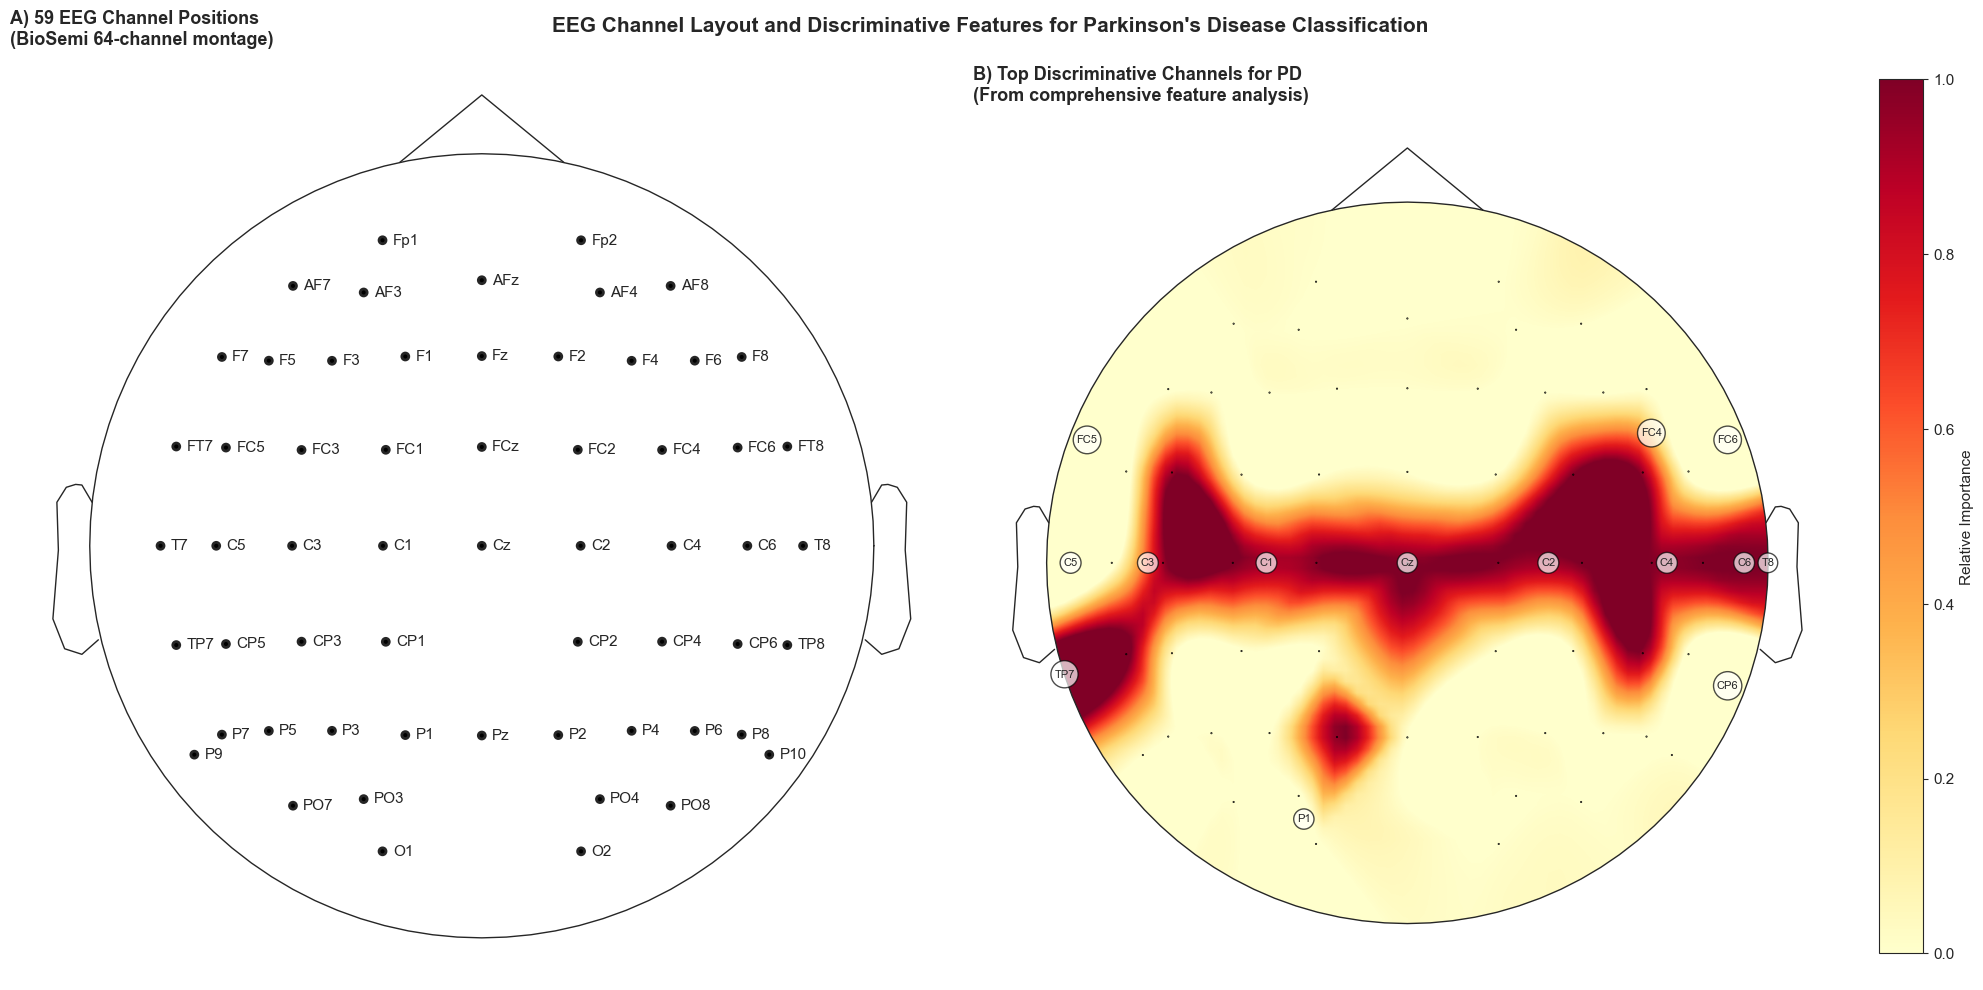

✓ Saved: results/snn/channel_visualization_thesis_figure.png

This combined figure is ready for your thesis!


In [17]:
fig = plt.figure(figsize=(20, 10))

# Panel A: All channels with names
ax1 = plt.subplot(1, 2, 1)
mne.viz.plot_sensors(info, kind='topomap', ch_type='eeg',
                     show_names=True, show=False, axes=ax1)
ax1.set_title('A) 59 EEG Channel Positions\n(BioSemi 64-channel montage)', 
             fontsize=13, fontweight='bold', loc='left')

# Panel B: Top discriminative channels
ax2 = plt.subplot(1, 2, 2)
im, _ = mne.viz.plot_topomap(
    importance,
    evoked.info,
    axes=ax2,
    show=False,
    cmap='YlOrRd',
    contours=0,
    sensors=True
)
ax2.set_title('B) Top Discriminative Channels for PD\n(From comprehensive feature analysis)',
             fontsize=13, fontweight='bold', loc='left')

# Manually add labels for top channels in panel B
for idx in top_channels:
    pos = evoked.info['chs'][idx]['loc'][:2]
    ax2.text(pos[0], pos[1], f"{channel_mapping.get(idx, '')}", fontsize=8, ha='center', va='center',
            bbox=dict(boxstyle='circle', facecolor='white', edgecolor='black', alpha=0.7))

# Add colorbar for panel B
cbar = plt.colorbar(im, ax=ax2, fraction=0.046, pad=0.04)
cbar.set_label('Relative Importance', fontsize=11)

plt.suptitle('EEG Channel Layout and Discriminative Features for Parkinson\'s Disease Classification',
            fontsize=15, fontweight='bold', y=0.98)

plt.tight_layout()
plt.savefig('results/snn/channel_visualization_thesis_figure.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✓ Saved: results/snn/channel_visualization_thesis_figure.png")
print("\nThis combined figure is ready for your thesis!")

## 9. Export Channel Information for Reference

In [18]:
import pandas as pd

# Create comprehensive channel reference table
channel_df = pd.DataFrame({
    'Index': range(59),
    'Channel_Name': included_channels,
    'Brain_Region': regions,
    'Top_Feature': ['Yes' if i in top_channels else 'No' for i in range(59)]
})

# Add position coordinates
coords = []
for ch in included_channels:
    pos = channel_pos[ch]
    coords.append(pos)

channel_df['X'] = [c[0] for c in coords]
channel_df['Y'] = [c[1] for c in coords]
channel_df['Z'] = [c[2] for c in coords]

# Save to CSV
channel_df.to_csv('results/snn/channel_reference_table.csv', index=False)

print("✓ Saved: results/snn/channel_reference_table.csv")
print("\nChannel Reference Table (first 10 rows):")
print(channel_df.head(10))

print("\nKey channels from your analysis:")
key_channels = [19, 43, 42, 12, 13]
print(channel_df[channel_df['Index'].isin(key_channels)][['Index', 'Channel_Name', 'Brain_Region']])

✓ Saved: results/snn/channel_reference_table.csv

Channel Reference Table (first 10 rows):
   Index Channel_Name Brain_Region Top_Feature         X         Y         Z
0      0          Fp1      Frontal          No -0.029339  0.090295 -0.003315
1      1          AF7      Frontal          No -0.055806  0.076810 -0.003315
2      2          AF3      Frontal          No -0.038593  0.082764  0.026186
3      3           F1      Frontal          No -0.027262  0.067475  0.061065
4      4           F3      Frontal          No -0.051776  0.063938  0.047500
5      5           F5      Frontal          No -0.069254  0.060202  0.024588
6      6           F7      Frontal          No -0.076810  0.055806 -0.003315
7      7          FT7      Frontal          No -0.090295  0.029339 -0.003315
8      8          FC5      Frontal         Yes -0.084349  0.032379  0.029357
9      9          FC3      Frontal          No -0.064256  0.034165  0.061065

Key channels from your analysis:
    Index Channel_Name Brain